# Pytroch

In [8]:
import torch
import math
from torchvision.io import read_image,ImageReadMode

dtype = torch.float
device = torch.device("cpu")

In [12]:
image = read_image("vaticano.jpg",ImageReadMode.GRAY)

In [13]:
image

tensor([[[170, 170, 170,  ..., 202, 201, 200],
         [171, 171, 170,  ..., 202, 201, 200],
         [172, 172, 171,  ..., 202, 201, 200],
         ...,
         [ 13,  10,  15,  ...,  30,  51,  50],
         [ 12,  10,  17,  ...,  32,  54,  50],
         [ 12,  11,  17,  ...,  31,  53,  47]]], dtype=torch.uint8)

In [60]:
image.size()

torch.Size([1, 2000, 2000])

In [62]:
image = image.view(2000,2000)

In [63]:
image

tensor([[170, 170, 170,  ..., 202, 201, 200],
        [171, 171, 170,  ..., 202, 201, 200],
        [172, 172, 171,  ..., 202, 201, 200],
        ...,
        [ 13,  10,  15,  ...,  30,  51,  50],
        [ 12,  10,  17,  ...,  32,  54,  50],
        [ 12,  11,  17,  ...,  31,  53,  47]], dtype=torch.uint8)

In [64]:
# import numpy as np
# mask_numpy = np.random.randint(2, size=(9,9))

mask = torch.tensor([[-1,-1,-1,-1,-1,-1,-1,-1,-1],
              [-1,8,-1,-1,8,-1,-1,8,-1],
              [-1,-1,-1,-1,-1,-1,-1,-1,-1],
              [-1,-1,-1,-1,-1,-1,-1,-1,-1],
              [-1,8,-1,-1,8,-1,-1,8,-1],
              [-1,-1,-1,-1,-1,-1,-1,-1,-1],
              [-1,-1,-1,-1,-1,-1,-1,-1,-1],
              [-1,8,-1,-1,8,-1,-1,8,-1],
              [-1,-1,-1,-1,-1,-1,-1,-1,-1]],device=device,dtype=torch.int8)

In [65]:
mask

tensor([[-1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1,  8, -1, -1,  8, -1, -1,  8, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1,  8, -1, -1,  8, -1, -1,  8, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1,  8, -1, -1,  8, -1, -1,  8, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1]], dtype=torch.int8)

In [66]:
mask.size()[0]

9

In [70]:
# Kernel con shape ==
def convolution2d(image, kernel):
    axi_kernel = kernel.size()[0]
    # print(axi_kernel)
    
    rows_image = image.size()[0]
    colums_image = image.size()[1]
    # print(rows_image)
    
    limit_y = rows_image - axi_kernel + 1
    limit_x = colums_image - axi_kernel + 1
    new_image = torch.zeros((rows_image,colums_image))
    # print(new_image)
    # print(new_image.size())
    for i in range(limit_y):
        for j in range(limit_x):
            sub_seccion_image= image[i:i+axi_kernel, j:j+axi_kernel]
            filtre = sub_seccion_image*kernel
            new_image[i][j] = torch.sum(filtre)
    return new_image

In [71]:
new_image = convolution2d(image,mask)

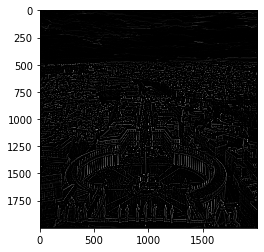

In [72]:
from matplotlib import pyplot as plt
# new_image = new_image.view(2000,2000)
plt.imshow(new_image,cmap='gray',vmin=0,vmax=255)
plt.show()